In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string
import nltk
from wordcloud import WordCloud
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\UDAY KUMAR\Documents\whatsapp\DA\ML\Data/spam.csv", encoding = 'latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df.shape

(5572, 5)

In [4]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [5]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace = True)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
df.rename(columns = {'v1':'Target', 'v2':'Text'}, inplace = True)

In [7]:
df.head()

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [9]:
df.Target = le.fit_transform(df.Target)

In [10]:
df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
df.duplicated().sum()

np.int64(403)

In [12]:
df.drop_duplicates(keep = 'first', inplace = True)

In [13]:
df.shape

(5169, 2)

In [14]:
df.Target.value_counts()

Target
0    4516
1     653
Name: count, dtype: int64

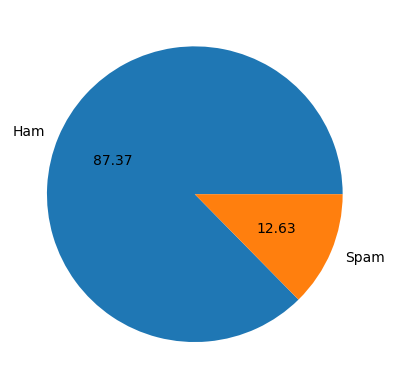

In [15]:
plt.pie(df.Target.value_counts(), labels = ['Ham', 'Spam'], autopct = '%0.2f')
plt.show()

In [16]:
df['num_characters'] = df.Text.apply(len)
df.head()

,Target,Text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [17]:
df['num_words'] = df.Text.apply(lambda x: len(nltk.word_tokenize(x)))

In [18]:
df.head()

,Target,Text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [19]:
df['num_sentences'] = df.Text.apply(lambda x:len(nltk.sent_tokenize(x)))

In [20]:
df.head()

,Target,Text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [21]:
df[df['Target']==1].describe()

,Target,num_characters,num_words,num_sentences
count,653.0,653.000000,653.000000,653.000000
mean,1.0,137.891271,27.667688,2.970904
std,0.0,30.137753,7.008418,1.488425
min,1.0,13.000000,2.000000,1.000000
25%,1.0,132.000000,25.000000,2.000000
50%,1.0,149.000000,29.000000,3.000000
75%,1.0,157.000000,32.000000,4.000000
max,1.0,224.000000,46.000000,9.000000


In [22]:
df[df['Target']==0].describe()

,Target,num_characters,num_words,num_sentences
count,4516.0,4516.000000,4516.000000,4516.000000
mean,0.0,70.459256,17.123782,1.820195
std,0.0,56.358207,13.493970,1.383657
min,0.0,2.000000,1.000000,1.000000
25%,0.0,34.000000,8.000000,1.000000
50%,0.0,52.000000,13.000000,1.000000
75%,0.0,90.000000,22.000000,2.000000
max,0.0,910.000000,220.000000,38.000000


<Axes: xlabel='num_characters', ylabel='Count'>

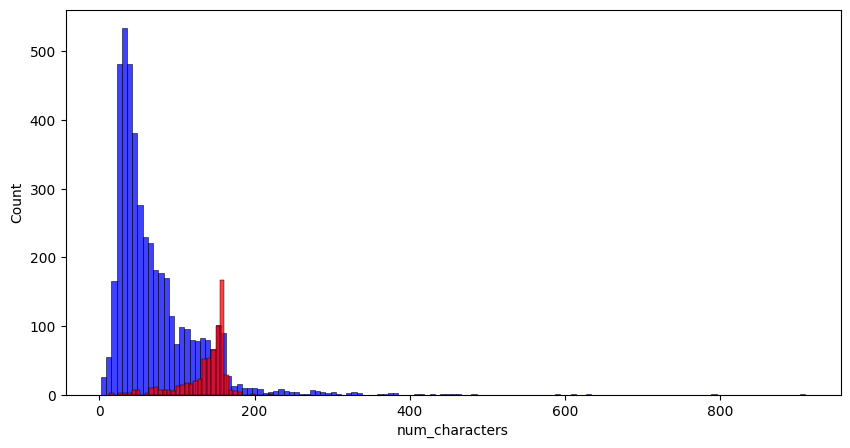

In [23]:
plt.figure(figsize = (10,5))
sns.histplot(df[df['Target']==0]['num_characters'], color = 'blue')
sns.histplot(df[df['Target']==1]['num_characters'], color = 'red')

<Axes: xlabel='num_words', ylabel='Count'>

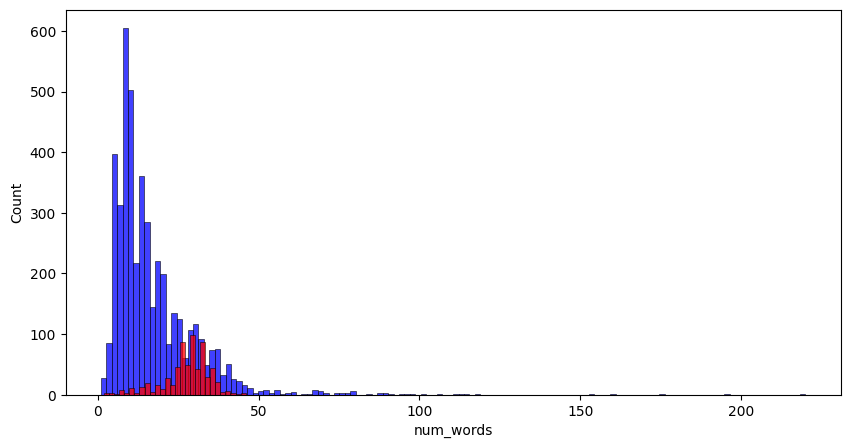

In [24]:
plt.figure(figsize = (10,5))
sns.histplot(df[df['Target']==0]['num_words'], color = 'blue')
sns.histplot(df[df['Target']==1]['num_words'], color = 'red')

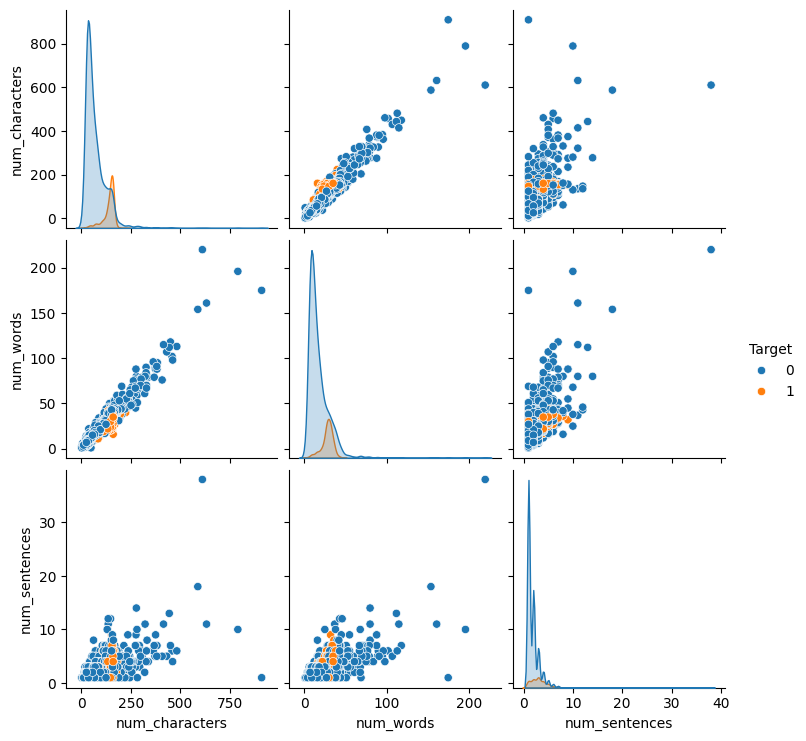

In [25]:
sns.pairplot(df,hue='Target')

<Axes: >

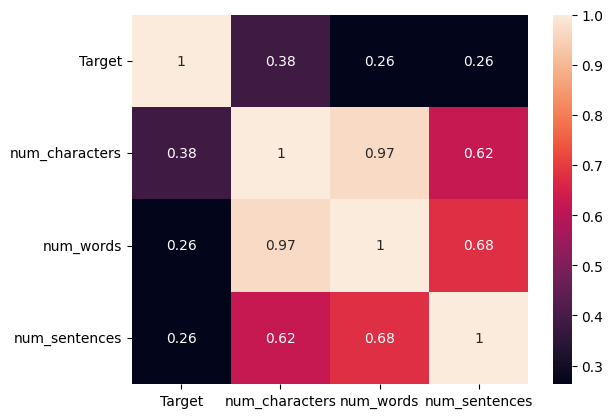

In [26]:
sns.heatmap(df[['Target','num_characters','num_words','num_sentences']].corr(),annot = True)

In [27]:
ps = PorterStemmer()

def transform(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

In [28]:
df['Text'] = df.Text.apply(transform)

In [29]:
df.head()

,Target,Text,num_characters,num_words,num_sentences
0,0,go jurong point crazi avail bugi n great world...,111,24,2
1,0,ok lar joke wif u oni,29,8,2
2,1,free entri 2 wkli comp win fa cup final tkt 21...,155,37,2
3,0,u dun say earli hor u c alreadi say,49,13,1
4,0,nah think goe usf live around though,61,15,1


In [30]:
from wordcloud import WordCloud
wc = WordCloud(width = 1000, height = 1000, min_font_size = 10, background_color = 'white')

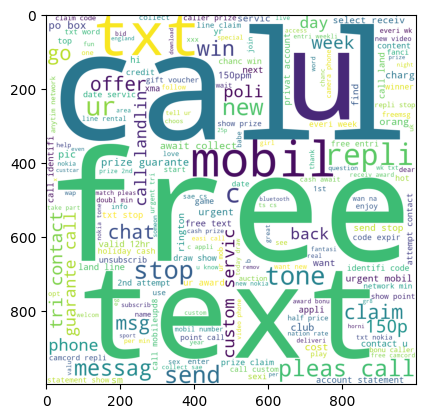

In [31]:
spam_wc = wc.generate(df[df['Target']==1]['Text'].str.cat(sep=" "))
plt.imshow(spam_wc)

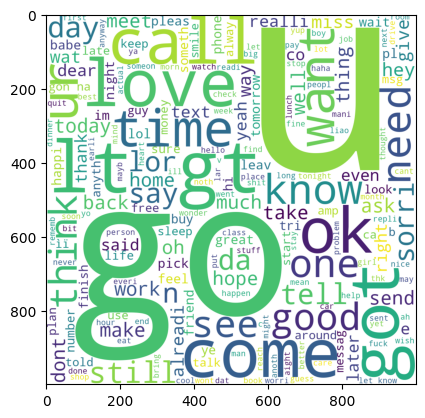

In [32]:
spam_wc = wc.generate(df[df['Target']==0]['Text'].str.cat(sep=" "))
plt.imshow(spam_wc)

In [33]:
spam_corpus = []
for msg in df[df['Target']==1]['Text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [34]:
len(spam_corpus)

9939

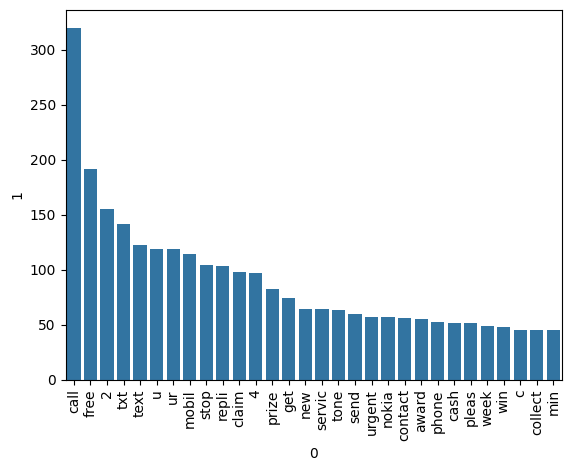

In [35]:
from collections import Counter
sns.barplot(x = pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y = pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [36]:
ham_corpus = []
for msg in df[df['Target']==0]['Text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [37]:
len(ham_corpus)

35404

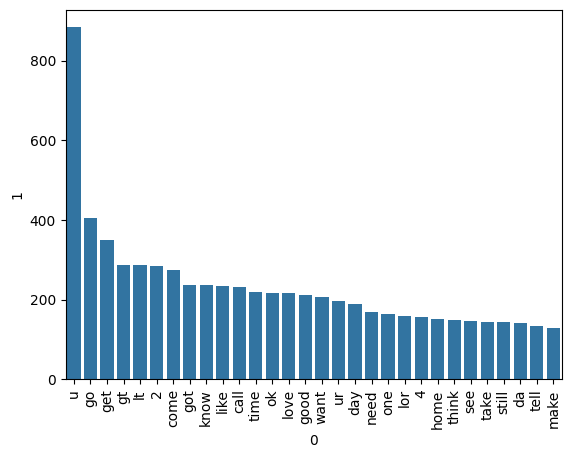

In [38]:
from collections import Counter
sns.barplot(x = pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y = pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [39]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [40]:
X = cv.fit_transform(df['Text']).toarray()

In [41]:
y = df['Target'].values

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [43]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [44]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [45]:
gnb.fit(X_train, y_train)
predg = gnb.predict(X_test)
print("Accuracy Score = ",accuracy_score(y_test, predg))
print("Confusion Matrix = ",confusion_matrix(y_test, predg))
print("Precision Score = ",precision_score(y_test, predg))

Accuracy Score =  0.8800773694390716
Confusion Matrix =  [[792 104]
 [ 20 118]]
Precision Score =  0.5315315315315315


In [46]:
mnb.fit(X_train, y_train)
predm = mnb.predict(X_test)
print("Accuracy Score = ",accuracy_score(y_test, predm))
print("Confusion Matrix = ",confusion_matrix(y_test, predm))
print("Precision Score = ",precision_score(y_test, predm))

Accuracy Score =  0.9642166344294004
Confusion Matrix =  [[871  25]
 [ 12 126]]
Precision Score =  0.8344370860927153


In [47]:
bnb.fit(X_train, y_train)
predb = bnb.predict(X_test)
print("Accuracy Score = ",accuracy_score(y_test, predb))
print("Confusion Matrix = ",confusion_matrix(y_test, predb))
print("Precision Score = ",precision_score(y_test, predb))

Accuracy Score =  0.9700193423597679
Confusion Matrix =  [[893   3]
 [ 28 110]]
Precision Score =  0.9734513274336283


In [63]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer()

In [64]:
X = tf.fit_transform(df['Text']).toarray()
y = df['Target'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

gnbt = GaussianNB()
mnbt = MultinomialNB()
bnbt = BernoulliNB()

print("GaussianNB")
gnbt.fit(X_train, y_train)
predg = gnbt.predict(X_test)
print("Accuracy Score = ",accuracy_score(y_test, predg))
print("Confusion Matrix = ",confusion_matrix(y_test, predg))
print("Precision Score = ",precision_score(y_test, predg))

print("\nMultinomialNB")
mnbt.fit(X_train, y_train)
predm = mnbt.predict(X_test)
print("Accuracy Score = ",accuracy_score(y_test, predm))
print("Confusion Matrix = ",confusion_matrix(y_test, predm))
print("Precision Score = ",precision_score(y_test, predm))

print("\nBernoulliNB")
bnbt.fit(X_train, y_train)
predm = bnbt.predict(X_test)
print("Accuracy Score = ",accuracy_score(y_test, predb))
print("Confusion Matrix = ",confusion_matrix(y_test, predb))
print("Precision Score = ",precision_score(y_test, predb))

GaussianNB
Accuracy Score =  0.8607350096711799
Confusion Matrix =  [[778 121]
 [ 23 112]]
Precision Score =  0.48068669527896996

MultinomialNB
Accuracy Score =  0.9526112185686654
Confusion Matrix =  [[899   0]
 [ 49  86]]
Precision Score =  1.0

BernoulliNB
Accuracy Score =  0.7852998065764023
Confusion Matrix =  [[799 100]
 [122  13]]
Precision Score =  0.11504424778761062


In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [65]:
lrc = LogisticRegression(solver = 'liblinear', penalty = 'l1')
svc = SVC(kernel = 'sigmoid', gamma = 1.0)
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth = 5)
knc = KNeighborsClassifier()
rfc = RandomForestClassifier(n_estimators = 50, random_state = 2)
bc = BaggingClassifier(n_estimators = 50, random_state = 2)
etc = ExtraTreesClassifier(n_estimators = 50, random_state = 2)
gbc = GradientBoostingClassifier(n_estimators = 50, random_state = 2)
xgb = XGBClassifier(n_estimators = 50, random_state = 2)

In [66]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb,
    'DT': dtc, 
    'LR': lrc,
    'RF': rfc,
    'BGC': bc, 
    'ETC': etc,
    'GBDT':gbc,
    'XGB':xgb
}

In [67]:
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [68]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    curr_accuracy, curr_precision = train_classifier(clf,X_train,y_train,X_test,y_test)
    print("For ",name)
    print("Accuracy = ",curr_accuracy)
    print("Precision = ",curr_precision)
    accuracy_scores.append(curr_accuracy)
    precision_scores.append(curr_precision)

For  SVC
Accuracy =  0.9661508704061895
Precision =  0.9545454545454546
For  KN
Accuracy =  0.9003868471953579
Precision =  1.0
For  NB
Accuracy =  0.9526112185686654
Precision =  1.0
For  DT
Accuracy =  0.9168278529980658
Precision =  0.788235294117647
For  LR
Accuracy =  0.9400386847195358
Precision =  0.8842105263157894
For  RF
Accuracy =  0.9632495164410058
Precision =  1.0
For  BGC
Accuracy =  0.9516441005802708
Precision =  0.8632478632478633
For  ETC
Accuracy =  0.9700193423597679
Precision =  1.0
For  GBDT
Accuracy =  0.9342359767891683
Precision =  0.8764044943820225
For  XGB
Accuracy =  0.9564796905222437
Precision =  0.9090909090909091


In [69]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(), 'Accuracy':accuracy_scores, 'Precision':precision_scores}).sort_values(['Precision','Accuracy'],ascending = [False, False])
performance_df

,Algorithm,Accuracy,Precision
7,ETC,0.970019,1.000000
5,RF,0.963250,1.000000
2,NB,0.952611,1.000000
1,KN,0.900387,1.000000
0,SVC,0.966151,0.954545
9,XGB,0.956480,0.909091
4,LR,0.940039,0.884211
8,GBDT,0.934236,0.876404
6,BGC,0.951644,0.863248
3,DT,0.916828,0.788235


In [70]:
import pickle as pkl
pkl.dump(tf,open('vectorizer.pkl','wb'))
pkl.dump(etc,open('model.pkl','wb'))

In [30]:
import pickle as pkl
pkl.dump(transform,open('transform_text.pkl','wb'))